<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/04.linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Linear regression is a parametric method that follows a linear model: i.e., there is a linear relationship between variables.


## Model
The equation of the linear model is:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

- h: hypothesis
- $\theta_0, \theta_1 $: parameters
- x: input


## Cost function
Following Andrew Ng's [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning), here is the cost function we use a slightly modified MSE (Mean Squared Error) to compute the error:

*(To display math expressions correctly, open the notebook in colab)

$$ J(\theta) = \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

- $J(\theta)$: Cost function
- m: number  of samples
- h: hypothesis
- y: ground truth

### Two things to note are:
1. Note that the superscript i in ($x^{(i)}, y^{(i)}$) does not mean an exponential term , but an index.
2. The denominator m is multiplied by 2 to make further calculations (i.e., taking derivatives) easy. It does not affect the result in computing the errors.



## Gradient Descent
The goal of linear regression is to find the parameters $\theta_0$ and $ \theta_1$ that minimize the error.
That amounts to taking partial derivatives of the quadratic error function in terms of the two parameter terms $\theta_0$ and $ \theta_1$. You can see why by plotting the error function. The convex shape tells us that there is a global minimum at the lowest point and partial derivatives would help us calculate how much we need to adjust the parameters on each iteration. 


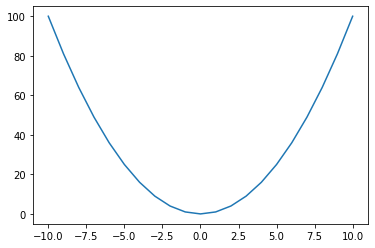

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-10, 11, 1)
Y = X**2
Y
plt.plot(X, Y)

### Derivation of partial derivatives
Taking partial derivatives on the cost function J:
$$
J(\theta) = \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 
$$

means:

$$
\frac{\delta}{\delta\theta_j} J(\theta_0, \theta_1) = \frac{\delta}{\delta\theta_j}[ \frac{1}{2m}\sum\limits_{t=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 ]
$$

Since $h_\theta = \theta_0 + \theta_1x $, we can substitute h:

$$
 = \frac{\delta}{\delta\theta_j}[ \frac{1}{2m}\sum\limits_{t=1}^{m}(\theta_0 + \theta_1x^{(i)} - y^{(i)})^2 ]
$$

To take a partial derivative, you need to expand the term.

$$
 (\theta_0 + \theta_1x^{(i)} - y^{(i)})^2 = \theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}
$$

Taking partial derivatives for $ \theta_0 $ and $\theta_1$, gives us:


$$
\frac{\delta}{\delta\theta_0}[ 
\theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}]
$$

$$
= 2\theta_0 + 2\theta_1x^{(i)} - 2y^{(i)}
$$
$$
= 2(\theta_0 + \theta_1x^{(i)} - y^{(i)}) = 2(h_\theta x^{(i)} - y^{(i)})
$$
In other words,
$$ \frac{\delta}{\delta\theta_0} J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta x^{(i)} - y^{(i)})
$$


Similarly, for $ \theta_1$:
$$
\frac{\delta}{\delta\theta_1}[ 
\theta_0^2 + (\theta_1x^{(i)})^2 + (y^{(i)})^2 + 2\theta_0 \theta_1x^{(i)} - 2\theta_0 y^{(i)} - 2\theta_1x^{(i)} y^{(i)}]
$$

$$
= 2\theta_1x^{(i)} + 2\theta_0x^{(i)} - 2x^{(i)}y^{(i)}
$$

$$
= 2(\theta_0 + \theta_1x^{(i)} - y^{(i)})x^{(i)} = 2(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}
$$

In other words,

$$ \frac{\delta}{\delta\theta_1} J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$


In summary,

$$ \frac{\delta}{\delta\theta_0} J(\theta_0, \theta_1) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) $$

and

$$ \frac{\delta}{\delta\theta_1} J(\theta_0, \theta_1) = \frac{1}{m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)} $$

In practice, we add a learning rate $\alpha$ and update all $\theta s$ simultaneously. 

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

So this is the formula we will use to update the parameters.

In [ ]:
!git clone https://github.com/changsin/MIU_ML

Cloning into 'ML'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


# Sample dataset:
 [sklearn diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html)

## X column attributes:
1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level

(mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

## y target value:
 quantitative measure of disease progression one year after baseline


In [ ]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [ ]:
# just use the first 20 items in the dataset
PART_SIZE = 20

# m = y.size
m = PART_SIZE

# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X_part = np.stack([np.ones(m), X[:PART_SIZE, 8]*100], axis=1)
y_part = y[:PART_SIZE]

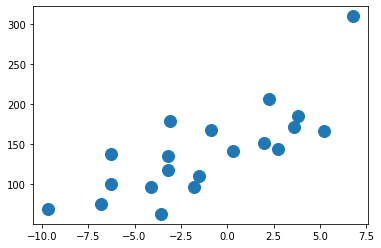

In [ ]:
import matplotlib.pyplot as plt

def plot_data(X, y, limit=20):
  fig, ax = plt.subplots()
  ax.plot(X, y, marker='o', linestyle='', ms=12, label='+')

  return ax

ax = plot_data(X_part[:, 1], y_part)

x_line = np.linspace(-10, 10, 100)
y_line = 10*x_line + 150

# ax.plot(x_line, y_line, 'g', label='y=wx+b')

In [ ]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================

    # TODO:

    # ===========================================================
    return J

In [ ]:
theta=np.array([0.0, 0.0])
J = computeCost(X_part, y_part, theta=theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 11497.70\n')

With theta = [0, 0] 
Cost computed = 11497.70
Expected cost value (approximately) 11497.70



In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        theta_zero, theta_one = theta
        # ==================== YOUR CODE HERE =================================
        
        # TODO

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append([J, theta_zero, theta_one])
    
    return theta, J_history

In [ ]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 300
alpha = 0.01

theta, J_history = gradientDescent(X_part, y_part, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

cost: 11294.96 theta: 1.41 1.58
cost: 11126.65 theta: 2.83 2.87
cost: 10974.88 theta: 4.25 3.91
cost: 10829.37 theta: 5.66 4.76
cost: 10684.50 theta: 7.07 5.45
cost: 10537.53 theta: 8.48 6.01
cost: 10387.40 theta: 9.88 6.47
cost: 10233.99 theta: 11.27 6.85
cost: 10077.70 theta: 12.65 7.15
cost: 9919.16 theta: 14.02 7.40
cost: 9759.07 theta: 15.38 7.61
cost: 9598.14 theta: 16.73 7.78
cost: 9436.99 theta: 18.06 7.92
cost: 9276.20 theta: 19.39 8.03
cost: 9116.24 theta: 20.70 8.13
cost: 8957.50 theta: 22.00 8.21
cost: 8800.31 theta: 23.29 8.28
cost: 8644.94 theta: 24.57 8.34
cost: 8491.57 theta: 25.84 8.38
cost: 8340.37 theta: 27.09 8.43
cost: 8191.46 theta: 28.33 8.46
cost: 8044.93 theta: 29.56 8.49
cost: 7900.83 theta: 30.78 8.52
cost: 7759.21 theta: 31.98 8.55
cost: 7620.08 theta: 33.17 8.57
cost: 7483.45 theta: 34.36 8.59
cost: 7349.32 theta: 35.53 8.61
cost: 7217.67 theta: 36.69 8.63
cost: 7088.49 theta: 37.83 8.64
cost: 6961.76 theta: 38.97 8.66
cost: 6837.44 theta: 40.09 8.67
cost: 

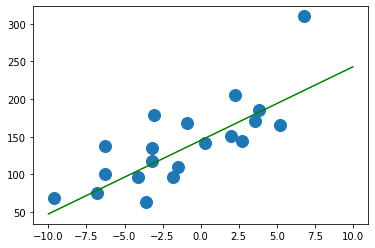

In [ ]:
ax = plot_data(X_part[:, 1], y_part)

x_line = np.linspace(-10, 10, 100)
y_line = theta[1]*x_line + theta[0]

ax.plot(x_line, y_line, 'g', label='y=wx+b')

In [ ]:
J_history = np.array(J_history)

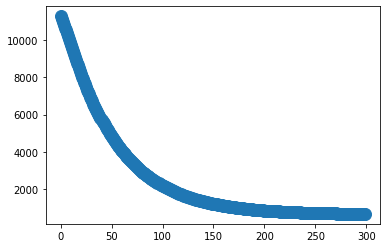

In [ ]:
ax1 = plot_data(range(len(J_history)), J_history[:, 0])

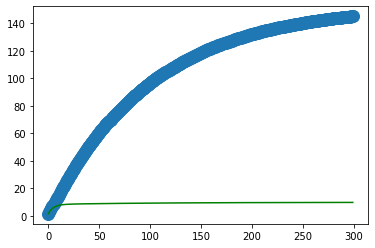

In [ ]:
ax1 = plot_data(range(len(J_history)), J_history[:, 1])

ax1.plot(range(len(J_history)), J_history[:, 2], 'g', label='y=wx+b')

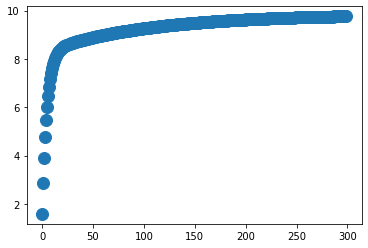

In [ ]:
ax1 = plot_data(range(len(J_history)), J_history[:, 2])